# Tensorflow Datasets：一系列现成的数据集

TensorFlow Datasets 提供了一系列可以和 TensorFlow 配合使用的数据集。它负责下载和准备数据，以及构建 `tf.data.Dataset`。

> Tensorflow Datasets 的数据托管在 Google 的服务器上，下载数据需要科学上网。

In [1]:
import os
os.environ["http_proxy"] = "http://127.0.0.1:1081"
os.environ["https_proxy"] = "http://127.0.0.1:1081"

## 安装

In [ ]:
!pip install tensorflow tensorflow-datasets matplotlib

## 引用

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


import tensorflow_datasets as tfds

## 列出可用的数据集

In [ ]:
tfds.list_builders()

## `tfds.load()` 一行代码获取数据集

In [3]:
mnist_train = tfds.load(name="mnist", split="train", data_dir="./1-mnist/mnist_data")
print(mnist_train)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


2022-01-20 17:03:47.686800: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 特征字典

Label: 4


2022-01-20 17:03:53.716957: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


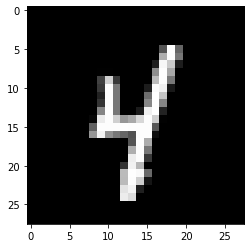

In [4]:
for mnist_example in mnist_train.take(1):  # 只取一个样本
    image, label = mnist_example["image"], mnist_example["label"]

    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    print("Label: %d" % label.numpy())

## 数据集信息

In [2]:
mnist_test, info = tfds.load(name="mnist", split="test", data_dir="./1-mnist/mnist_data", with_info=True)

2022-01-20 17:05:03.764122: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='./1-mnist/mnist_data/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


## 可视化

2022-01-20 17:05:09.373146: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


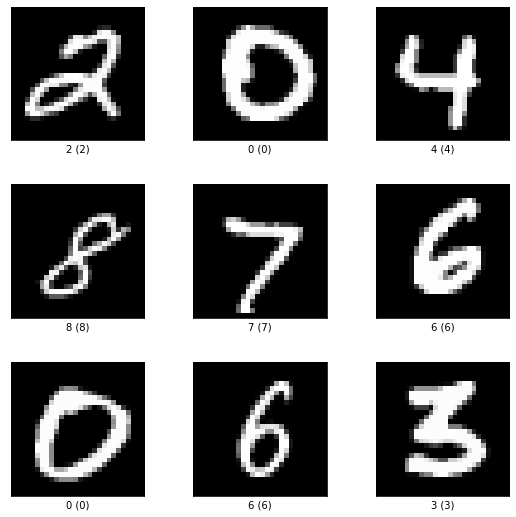

In [4]:
fig = tfds.show_examples(mnist_test, info)